<a href="https://colab.research.google.com/github/nameeshsachdev2025/Brain_Tumor_classification/blob/main/brain_tumor_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Preprocessing the images


In [ ]:
import numpy as np
import cv2
import os
from imutils import grab_contours

def preprocess_and_resize(image, target_size=256):
    grayscale = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    blurred = cv2.GaussianBlur(grayscale, (3, 3), 0)

    binary_mask = cv2.threshold(blurred, 45, 255, cv2.THRESH_BINARY)[1]
    #as the function produces an img and return value as a tuple  hence [1] is used
    binary_mask = cv2.erode(binary_mask, None, iterations=2)
    binary_mask = cv2.dilate(binary_mask, None, iterations=2)#NONE takes (3x3 )mask matrix

    detected_contours = grab_contours(cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE))
    if not detected_contours:
        return cv2.resize(image, (target_size, target_size))

    x_coord, y_coord, width, height = cv2.boundingRect(max(detected_contours, key=cv2.contourArea))
    cropped_image = image[y_coord:y_coord+height, x_coord:x_coord+width]
    return cv2.resize(cropped_image, (target_size, target_size))

def process_dataset(dataset_path, save_folder):
    IMG_SIZE = 256
    for dir_name in os.listdir(dataset_path):
        dir_path = os.path.join(dataset_path, dir_name)

        # to skip non-directory files like .DS_Store
        if not os.path.isdir(dir_path):
            continue

        save_path = os.path.join(save_folder, dir_name)
        os.makedirs(save_path, exist_ok=True)

        for img_name in os.listdir(dir_path):
            img_path = os.path.join(dir_path, img_name)

            if not os.path.isfile(img_path):
                continue

            image = cv2.imread(img_path)
            if image is None:
                continue

            new_img = preprocess_and_resize(image, IMG_SIZE)
            cv2.imwrite(os.path.join(save_path, img_name), new_img)

if __name__ == "__main__":
    process_dataset("/content/drive/MyDrive/archive (3) 2/Training", "cleaned/Training")
    process_dataset("/content/drive/MyDrive/archive (3) 2/Testing", "cleaned/Testing")




Data Analysis

In [ ]:
from os.path import isdir
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

def analyze_dataset(dataset_path):
  data={'class_name':[],'img_name':[],'width_before':[],'width_after':[],
        'height_before':[],'height_after':[],'cropped':[],'brightness': []
  }
  IMG_SIZE=256
  for class_name in os.listdir(dataset_path):
    class_path=os.path.join(dataset_path,class_name)
    if not os.path.isdir(class_path):
      continue

    for img_name in os.listdir(class_path):
      img_path=os.path.join(class_path,img_name)
      if not os.path.isfile(img_path):
        continue

      image=cv2.imread(img_path)
      if image is None:
        continue

      data['class_name'].append(class_name)
      data['img_name'].append(img_name)
      h,w,_=image.shape
      data['width_before'].append(w)
      data['height_before'].append(h)

      grayscale=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
      blurred=cv2.GaussianBlur(grayscale,(3,3),0)
      binary_mask=cv2.threshold(blurred,45,255,cv2.THRESH_BINARY)[1]
      binary_mask=cv2.erode(binary_mask,None,iterations=2)
      binary_mask=cv2.dilate(binary_mask,None,iterations=2)
      detected_contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

      cropped = False
      if detected_contours:
          x, y, w_c, h_c = cv2.boundingRect(max(detected_contours, key=cv2.contourArea))#will return the img with max contour area out of detected contours
          #boundingRect returns rectangle's top left corner and the width and height for the bounding rectangle
          cropped_image = image[y:y+h_c, x:x+w_c]
          cropped = True
      else:
          cropped_image = image
          w_c, h_c = w, h

      resized = cv2.resize(cropped_image, (IMG_SIZE, IMG_SIZE))
      data['width_after'].append(w_c)
      data['height_after'].append(h_c)
      data['cropped'].append(cropped)

      brightness = np.mean(cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY))
      data['brightness'].append(brightness)

  return pd.DataFrame(data)


In [ ]:
if __name__ == "__main__":
    dataset_path = "cleaned/Training"
    df = analyze_dataset(dataset_path)
    df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5721 entries, 0 to 5720
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   class_name     5721 non-null   object
 1   img_name       5721 non-null   object
 2   width_before   5721 non-null   int64 
 3   width_after    5721 non-null   int64 
 4   height_before  5721 non-null   int64 
 5   height_after   5721 non-null   int64 
 6   cropped        5721 non-null   bool  
dtypes: bool(1), int64(4), object(2)
memory usage: 273.9+ KB


In [ ]:
if __name__ == "__main__":
    dataset_path = "cleaned/Testing"
    df = analyze_dataset(dataset_path)  # Correct usage
    print(df.info())  # Print DataFrame information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1311 entries, 0 to 1310
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   class_name     1311 non-null   object
 1   img_name       1311 non-null   object
 2   width_before   1311 non-null   int64 
 3   width_after    1311 non-null   int64 
 4   height_before  1311 non-null   int64 
 5   height_after   1311 non-null   int64 
 6   cropped        1311 non-null   bool  
dtypes: bool(1), int64(4), object(2)
memory usage: 62.9+ KB
None


visualization


In [ ]:
if __name__ == "__main__":
  dataset_path = "cleaned/Training"
  df = analyze_dataset(dataset_path)
  print(df.head(10))

   class_name            img_name  width_before  width_after  height_before  \
0  meningioma      Tr-me_0592.jpg           256          256            256   
1  meningioma      Tr-me_1096.jpg           256          256            256   
2  meningioma      Tr-me_0650.jpg           256          256            256   
3  meningioma      Tr-me_1204.jpg           256          256            256   
4  meningioma      Tr-me_0709.jpg           256          256            256   
5  meningioma      Tr-me_0550.jpg           256          256            256   
6  meningioma      Tr-me_0856.jpg           256          256            256   
7  meningioma      Tr-me_0136.jpg           256          256            256   
8  meningioma      Tr-me_0368.jpg           256          256            256   
9  meningioma  Tr-me_0491 (1).jpg           256          255            256   

   height_after  cropped  brightness  
0           256     True  110.203918  
1           256     True   59.672699  
2           2

In [ ]:
def plot_analysis1(df):
  plt.figure(figsize=(7, 5))

  #trend for images count per class
  class_counts = df['class_name'].value_counts().plot(kind='bar', color='skyblue')
  plt.title('Images Count per Class')
  plt.xticks(rotation=45)
  plt.xlabel('Class')
  plt.ylabel('Number of Images ')
  plt.show()

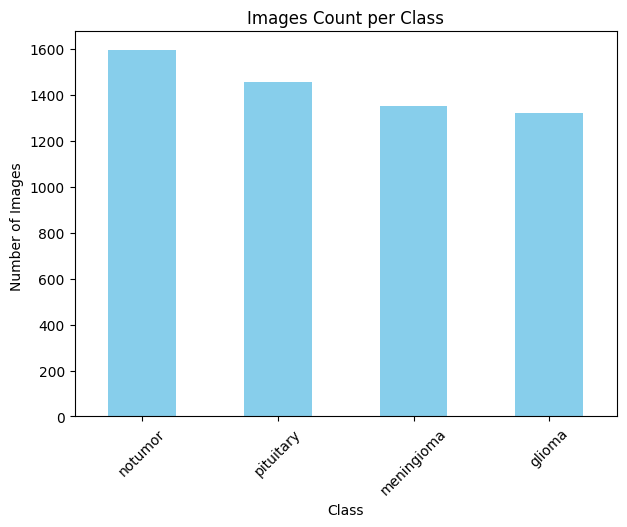

In [ ]:
if __name__ == "__main__":
  dataset_path = "cleaned/Training"
  df = analyze_dataset(dataset_path)
  plot_analysis1(df)

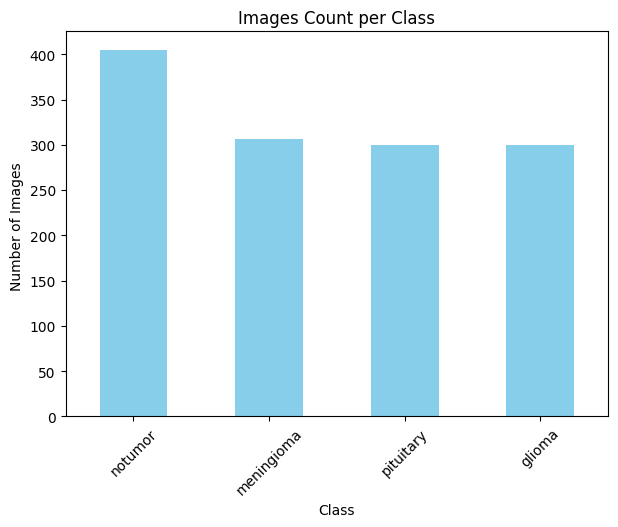

In [ ]:
if __name__ == "__main__":
  dataset_path = "cleaned/Testing"
  df = analyze_dataset(dataset_path)
  plot_analysis1(df)

In [ ]:
def plot_size_comparison(df):
    plt.figure(figsize=(8, 5))
    width_diff = df['width_before'] - df['width_after']
    height_diff = df['height_before'] - df['height_after']

    plt.bar(df.index, width_diff, alpha=0.7, label='Width Reduction', color='blue')#alpha is for some transparancy
    plt.bar(df.index, height_diff, alpha=0.7, label='Height Reduction', color='red')

    plt.xlabel("Image Index")
    plt.ylabel("Size Reduction (pixels)")
    plt.title("Comparison of Width and Height Before and After Cropping")
    plt.legend()
    plt.show()

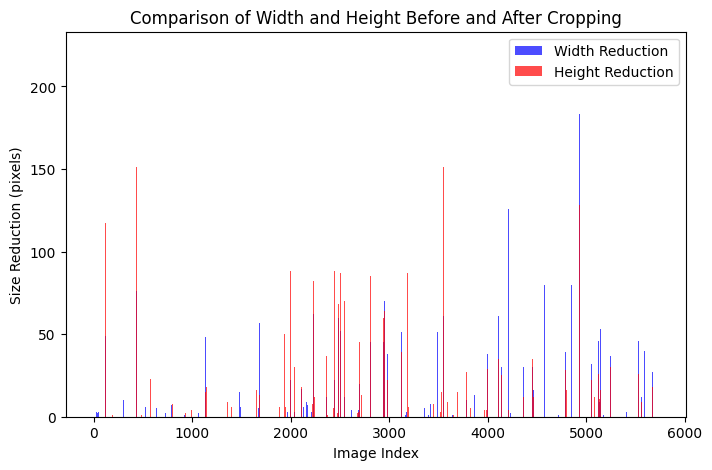

In [ ]:
if __name__ == "__main__":
  dataset_path = "cleaned/Training"
  df = analyze_dataset(dataset_path)
  plot_size_comparison(df)

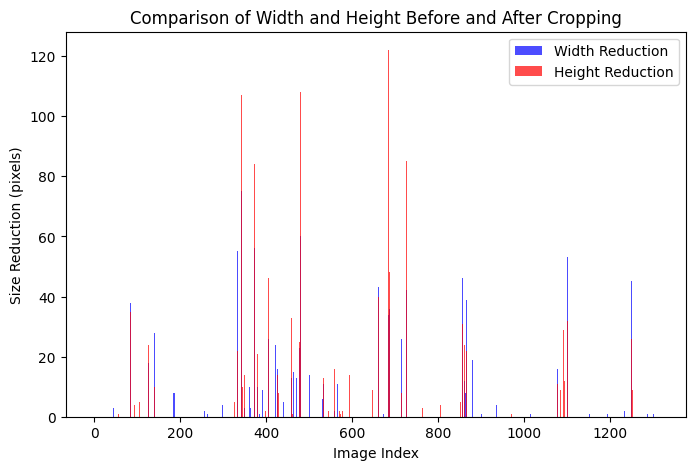

In [ ]:
if __name__ == "__main__":
  dataset_path = "cleaned/Testing"
  df = analyze_dataset(dataset_path)
  plot_size_comparison(df)

In [ ]:
def plot_brightness_distribution(df):
    plt.figure(figsize=(8, 5))
    plt.hist(df['brightness'], bins=20, alpha=0.7, color='orange')
    plt.xlabel("Brightness Level")
    plt.ylabel("Frequency")
    plt.title("Distribution of Image Brightness")
    plt.show()

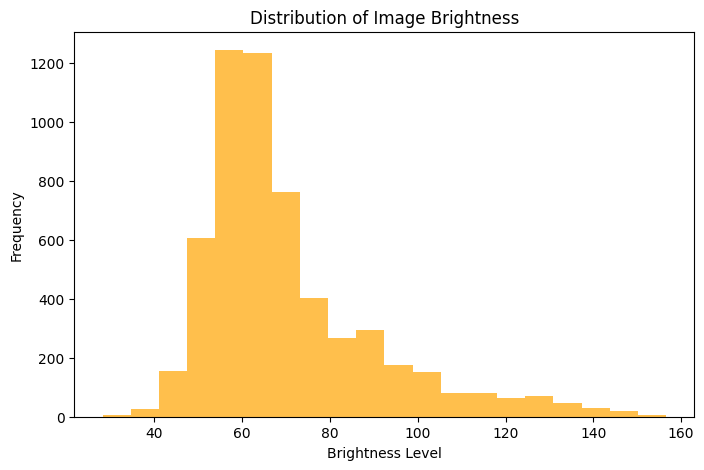

In [ ]:
if __name__ == "__main__":
  dataset_path = "cleaned/Training"
  df = analyze_dataset(dataset_path)
  plot_brightness_distribution(df)

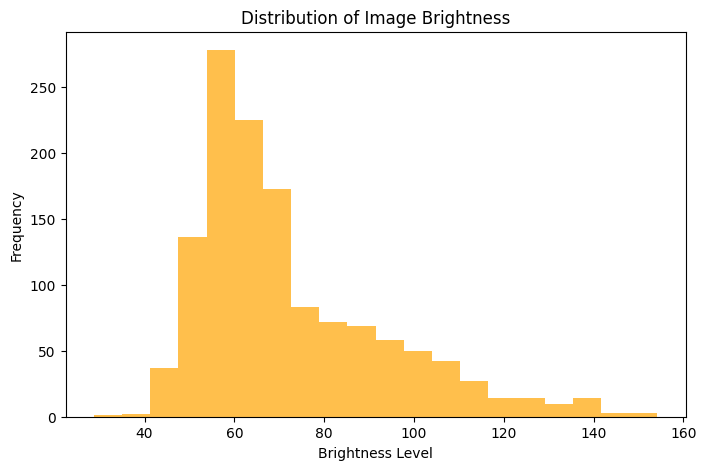

In [ ]:
if __name__ == "__main__":
  dataset_path = "cleaned/Testing"
  df = analyze_dataset(dataset_path)
  plot_brightness_distribution(df)

Pre -Processing The Images

In [ ]:
from tqdm import tqdm
labels = ['glioma', 'meningioma', 'notumor', 'pituitary']

x_train = []
y_train  = []
x_test = []
y_test = []

image_size = 150


for label in labels:
    trainPath = os.path.join('/content/cleaned/Training',label)
    for file in tqdm(os.listdir(trainPath)):
        image = cv2.imread(os.path.join(trainPath, file),0) # load images in gray.
        image = cv2.bilateralFilter(image, 2, 50, 50) # remove images noise while preserving edges 2-diameter of the neighbours and 50 for the preserving edges and 50 for smoothning
        image = cv2.applyColorMap(image, cv2.COLORMAP_BONE) # produce a pseudocolored image,bone will be displayed more
        image = cv2.resize(image, (image_size, image_size))
        x_train.append(image)
        y_train.append(labels.index(label))

    testPath = os.path.join('/content/cleaned/Testing',label)
    for file in tqdm(os.listdir(testPath)):
        image = cv2.imread(os.path.join(testPath, file),0)
        image = cv2.bilateralFilter(image, 2, 50, 50)
        image = cv2.applyColorMap(image, cv2.COLORMAP_BONE)
        image = cv2.resize(image, (image_size, image_size))
        x_test.append(image)
        y_test.append(labels.index(label))#will store numerical value of each img type like glioma 0 so range=[0 to 3]


x_train = np.array(x_train) / 255.0 # normalize Images into range 0 to 1.for cnn the pixel values must be between 0 and 1
x_test = np.array(x_test) / 255.0

print(x_train.shape)
print(x_test.shape)

100%|██████████| 300/300 [00:00<00:00, 699.18it/s]


(5721, 150, 150, 3)
(1311, 150, 150, 3)


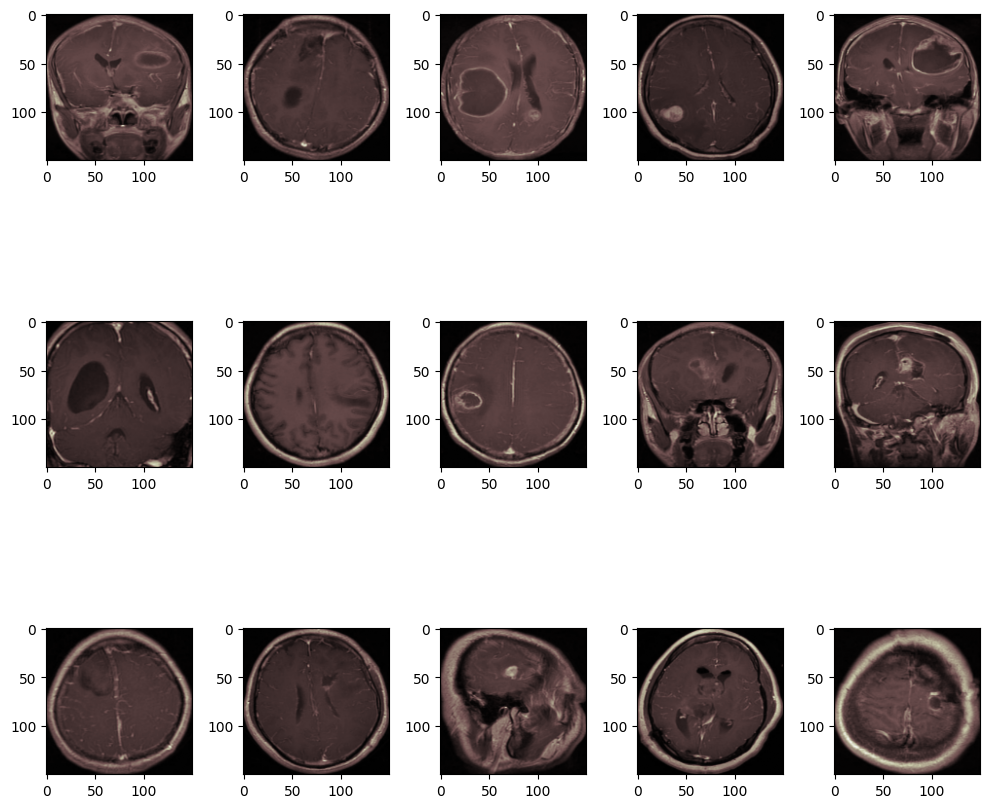

In [ ]:
images = [x_train[i] for i in range(15)]
fig, axes = plt.subplots(3, 5, figsize = (10, 10))
axes = axes.flatten()#makes the array from 2d to 1d as only 1 loop can be used
for img, ax in zip(images, axes):
    ax.imshow(img)
plt.tight_layout()#automatic spacing between subplots happens ,no overlapping
plt.show()

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow import keras



ONE HOT ENCODING OF LABELS AND MAKING VALIDATION SET



In [ ]:

x_train, y_train = shuffle(x_train, y_train,random_state=42)
y_train = tf.keras.utils.to_categorical(y_train) #One Hot Encoding on the labels means that converting the labelsof[0,1,2,3] to binary values
y_test = tf.keras.utils.to_categorical(y_test)
# spliting training data into training(80%) and validation(20%)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)# random state =42 so that the shuffle is the same everytime it is performed
print(x_val.shape)






(1145, 150, 150, 3)


DATA AUGMENTATION

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen=ImageDataGenerator(rotation_range=20,width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,fill_mode='reflect')
train_generator = datagen.flow(x_train, y_train, batch_size=32)





In [ ]:
from keras.callbacks import EarlyStopping,ReduceLROnPlateau,ModelCheckpoint,TensorBoard,LambdaCallback
from keras.layers import Input,Dropout, Dense,GlobalAveragePooling2D
from keras.models import Sequential,Model
from keras.applications.resnet import ResNet50
IMG_SIZE=150
net = ResNet50(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
model = net.output
model = GlobalAveragePooling2D()(model)
model = Dropout(0.4)(model)
model = Dense(4, activation="softmax")(model)
model = Model(inputs= net.input, outputs= model)# Model is a class in keras.models which creates models and this specifies that input layer is the new changes made in the net


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


GlobalAveragePooling2D -> This layer acts similar to the Max Pooling layer in CNNs, the only difference being is that it uses the Average values instead of the Max value while pooling.

Dropout -> This layer omits some of the neurons at each step from the layer making the neurons more independent from the neibouring neurons. It helps in avoiding overfitting. Neurons to be ommitted are selected at random.

Dense -> This is the output layer which classifies the image into 1 of the 4 possible classes. It uses the softmax function which is a generalization of the sigmoid function.

COMPILING THE MODEL

In [ ]:

adam = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=adam, loss = 'categorical_crossentropy', metrics=['accuracy'])
model.summary()

NameError: name 'model' is not defined

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

callbacks = [
    EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True),#if the model val loss does not improve for 5 loss values then stop training
    ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=3, min_lr=1e-6),
    ModelCheckpoint("best_model.h5", save_best_only=True, monitor="val_loss")
]


In [ ]:
val_generator = datagen.flow(x_val, y_val, batch_size=64)
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50,
    callbacks=callbacks,
    verbose=1
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step - accuracy: 0.7596 - loss: 0.6153

143/143 ━━━━━━━━━━━━━━━━━━━━ 119s 374ms/step - accuracy: 0.7603 - loss: 0.6138 - val_accuracy: 0.2332 - val_loss: 3.8714 - learning_rate: 1.0000e-04
Epoch 2/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 44s 303ms/step - accuracy: 0.9340 - loss: 0.1733 - val_accuracy: 0.2611 - val_loss: 7.4886 - learning_rate: 1.0000e-04
Epoch 3/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step - accuracy: 0.9582 - loss: 0.1211

143/143 ━━━━━━━━━━━━━━━━━━━━ 41s 289ms/step - accuracy: 0.9581 - loss: 0.1211 - val_accuracy: 0.2742 - val_loss: 1.8454 - learning_rate: 1.0000e-04
Epoch 4/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 40s 280ms/step - accuracy: 0.9764 - loss: 0.0829 - val_accuracy: 0.2638 - val_loss: 5.6405 - learning_rate: 1.0000e-04
Epoch 5/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 40s 279ms/step - accuracy: 0.9744 - loss: 0.0740 - val_accuracy: 0.3572 - val_loss: 2.1511 - learning_rate: 1.0000e-04
Epoch 6/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 40s 282ms/step - accuracy: 0.9862 - loss: 0.0436 - val_accuracy: 0.4201 - val_loss: 4.6829 - learning_rate: 1.0000e-04
Epoch 7/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step - accuracy: 0.9801 - loss: 0.0574

143/143 ━━━━━━━━━━━━━━━━━━━━ 42s 294ms/step - accuracy: 0.9801 - loss: 0.0573 - val_accuracy: 0.7022 - val_loss: 1.3208 - learning_rate: 2.0000e-05
Epoch 8/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step - accuracy: 0.9945 - loss: 0.0249

143/143 ━━━━━━━━━━━━━━━━━━━━ 46s 325ms/step - accuracy: 0.9945 - loss: 0.0249 - val_accuracy: 0.8987 - val_loss: 0.3298 - learning_rate: 2.0000e-05
Epoch 9/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step - accuracy: 0.9955 - loss: 0.0171

143/143 ━━━━━━━━━━━━━━━━━━━━ 42s 291ms/step - accuracy: 0.9955 - loss: 0.0171 - val_accuracy: 0.9686 - val_loss: 0.0852 - learning_rate: 2.0000e-05
Epoch 10/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step - accuracy: 0.9986 - loss: 0.0093

143/143 ━━━━━━━━━━━━━━━━━━━━ 46s 317ms/step - accuracy: 0.9986 - loss: 0.0093 - val_accuracy: 0.9808 - val_loss: 0.0683 - learning_rate: 2.0000e-05
Epoch 11/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step - accuracy: 0.9962 - loss: 0.0103

143/143 ━━━━━━━━━━━━━━━━━━━━ 42s 293ms/step - accuracy: 0.9962 - loss: 0.0103 - val_accuracy: 0.9860 - val_loss: 0.0536 - learning_rate: 2.0000e-05
Epoch 12/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 40s 279ms/step - accuracy: 0.9950 - loss: 0.0152 - val_accuracy: 0.9799 - val_loss: 0.0713 - learning_rate: 2.0000e-05
Epoch 13/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 40s 282ms/step - accuracy: 0.9950 - loss: 0.0187 - val_accuracy: 0.9817 - val_loss: 0.0723 - learning_rate: 2.0000e-05
Epoch 14/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 40s 281ms/step - accuracy: 0.9939 - loss: 0.0186 - val_accuracy: 0.9817 - val_loss: 0.0605 - learning_rate: 2.0000e-05
Epoch 15/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step - accuracy: 0.9959 - loss: 0.0156

143/143 ━━━━━━━━━━━━━━━━━━━━ 45s 306ms/step - accuracy: 0.9959 - loss: 0.0156 - val_accuracy: 0.9878 - val_loss: 0.0499 - learning_rate: 4.0000e-06
Epoch 16/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step - accuracy: 0.9965 - loss: 0.0107

143/143 ━━━━━━━━━━━━━━━━━━━━ 49s 342ms/step - accuracy: 0.9965 - loss: 0.0107 - val_accuracy: 0.9886 - val_loss: 0.0460 - learning_rate: 4.0000e-06
Epoch 17/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 41s 286ms/step - accuracy: 0.9952 - loss: 0.0164 - val_accuracy: 0.9869 - val_loss: 0.0468 - learning_rate: 4.0000e-06
Epoch 18/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 40s 278ms/step - accuracy: 0.9967 - loss: 0.0109 - val_accuracy: 0.9843 - val_loss: 0.0561 - learning_rate: 4.0000e-06
Epoch 19/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 41s 284ms/step - accuracy: 0.9971 - loss: 0.0062 - val_accuracy: 0.9834 - val_loss: 0.0600 - learning_rate: 4.0000e-06
Epoch 20/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 40s 281ms/step - accuracy: 0.9961 - loss: 0.0110 - val_accuracy: 0.9852 - val_loss: 0.0491 - learning_rate: 1.0000e-06
Epoch 21/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 40s 282ms/step - accuracy: 0.9984 - loss: 0.0077 - val_accuracy: 0.9860 - val_loss: 0.0522 - learning_rate: 1.0000e-06


Saving The Model in .h5 format and history in .json format


In [ ]:
import os

save_path = "/content/drive/MyDrive/BrainTumorModel"
os.makedirs(save_path, exist_ok=True)  # Create folder if it doesn't exist
model.save("/content/drive/MyDrive/BrainTumorModel/brain_tumor_model.h5")



In [ ]:
import json

# Save history after training
with open('/content/drive/MyDrive/BrainTumorModel/training_history.json', 'w') as f:
    json.dump(history.history, f)


In [ ]:
from tensorflow.keras.models import load_model
new_model=load_model('/content/drive/MyDrive/BrainTumorModel/brain_tumor_model.h5')

EVALUATION OF THE MODEL

History is a dictionary with arrays in it of loss,accuracy etc at each epoch ,hence extracting the history


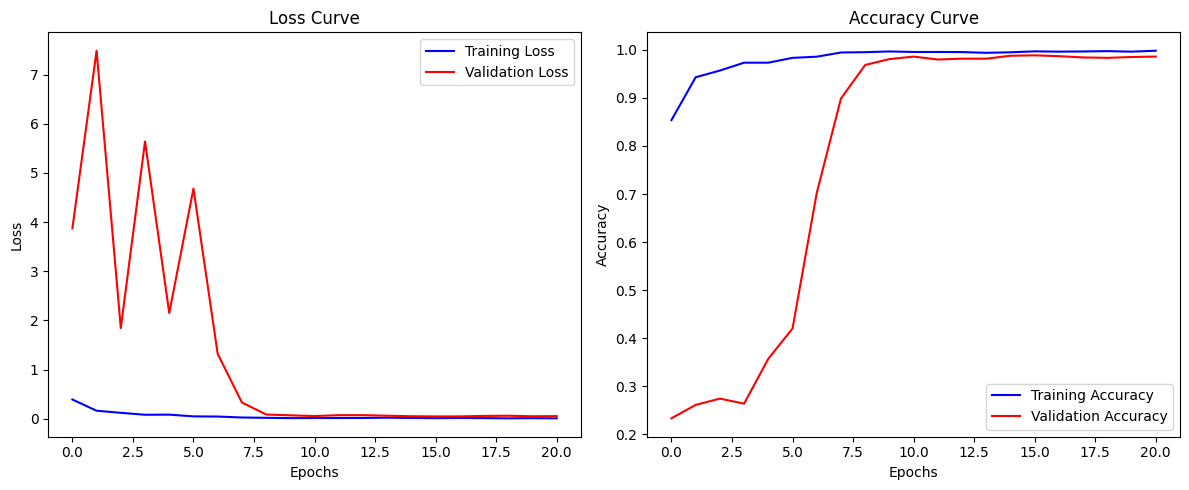

In [ ]:
import json
import matplotlib.pyplot as plt

with open('/content/drive/MyDrive/BrainTumorModel/training_history.json', 'r') as f:
    history = json.load(f)
train_loss = history['loss']
val_loss = history.get('val_loss')

import json
import matplotlib.pyplot as plt

with open('/content/drive/MyDrive/BrainTumorModel/training_history.json', 'r') as f:
    history = json.load(f)
train_loss = history['loss']
val_loss = history.get('val_loss')

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Loss Curve
axes[0].plot(train_loss, label='Training Loss', color='blue')
axes[0].plot(val_loss, label='Validation Loss', color='red')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].set_title('Loss Curve')
axes[0].legend()

# Accuracy Curve
axes[1].plot(history['accuracy'], label='Training Accuracy', color='blue')
axes[1].plot(history.get('val_accuracy',[]), label='Validation Accuracy', color='red')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Accuracy')
axes[1].set_title('Accuracy Curve')
axes[1].legend()

plt.tight_layout()
plt.show()

In [ ]:
adam = keras.optimizers.Adam(learning_rate=0.0001)
new_model.compile(optimizer=adam, loss = 'categorical_crossentropy', metrics=['accuracy'])

In [ ]:
x_test, y_test = shuffle(x_test, y_test, random_state=42)

In [ ]:
predictions=new_model.predict(x=x_test,batch_size=64,verbose=0)#verbose =0 as we dont want to see the output of each epoch
for i in predictions:
    print(i)

[1.80223549e-06 4.06139407e-07 1.10489516e-07 9.99997735e-01]
[1.28736755e-08 4.63421579e-10 7.61234652e-12 1.00000000e+00]
[9.999995e-01 7.126109e-08 3.135599e-07 6.203020e-08]
[3.3907651e-07 9.9999166e-01 1.3391507e-07 7.9057672e-06]
[1.7314720e-08 9.9999332e-01 1.7547949e-08 6.7316355e-06]
[1.6394536e-09 9.2843772e-10 1.0000000e+00 3.2232914e-14]
[9.9752742e-01 2.4618118e-03 3.2264893e-07 1.0381732e-05]
[6.3945342e-12 1.0124119e-10 1.2836407e-08 1.0000000e+00]
[1.7882656e-05 4.2412714e-05 9.9991560e-01 2.4062003e-05]
[5.5986329e-04 3.0520849e-02 1.8597960e-01 7.8293967e-01]
[9.9999785e-01 2.0455395e-06 2.0815667e-09 5.6497903e-08]
[7.8037665e-09 9.9999988e-01 2.8012751e-08 1.5640910e-07]
[1.6920508e-08 4.0551158e-06 2.9685374e-08 9.9999595e-01]
[1.6469440e-07 9.9999976e-01 5.5242815e-09 1.1624367e-07]
[9.1361420e-07 1.2944336e-06 9.9999774e-01 7.2796723e-08]
[2.2170576e-11 4.5862159e-09 1.0000000e+00 1.9617574e-09]
[3.2229568e-07 9.9999845e-01 1.2225867e-06 3.5508375e-08]
[3.6815873

In [ ]:
round_predictions=np.argmax(predictions,axis=1)#tells the highest prediction from each row
for i in round_predictions:#np.argmax outputs the index value having max probability
    print(i)

NameError: name 'np' is not defined

In [ ]:
y_test_labels = np.argmax(y_test, axis=1)
print(y_test_labels)

[3 3 0 ... 3 2 3]


In [ ]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

cm=confusion_matrix(y_true=y_test_labels,y_pred=round_predictions)
print(cm)

[[294   6   0   0]
 [  1 300   0   5]
 [  0   1 404   0]
 [  0   1   0 299]]


Confusion Matrix without Normalization
[[294   6   0   0]
 [  1 300   0   5]
 [  0   1 404   0]
 [  0   1   0 299]]


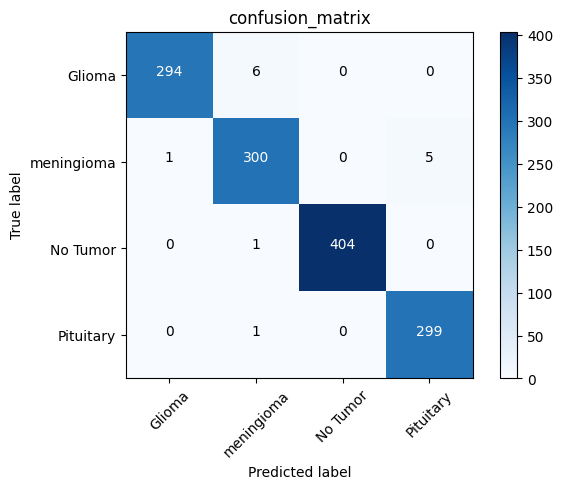

In [ ]:
def plot_confusion_matrix(cm,classes,normalize=False,title='confusion_matrix',cmap=plt.cm.Blues):
    #we can normalize the data by applying the normalize=True
    plt.imshow(cm,interpolation='nearest',cmap=cmap)#interpolation ensures sharp edges
    plt.title(title)
    plt.colorbar()#adds color bar for the value reference
    tick_marks=np.arange(len(classes))# here [0,1] as two labels
    plt.xticks(tick_marks,classes,rotation=45)# tick marks specifies the exactpositions of the labels and the names of the labels are given by classes
    plt.yticks(tick_marks,classes)
    if normalize:
        cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]# for conversion to a percentage TO understand see chatgpt
        print('Normalized Confusion Matrix')
    else:
        print('Confusion Matrix without Normalization')
    print(cm)
    thresh=cm.max()/2.0

    for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],horizontalalignment='center',color='white'if cm[i,j]>thresh else 'black')
    plt.tight_layout()# adjusts layout to prevent overlapping of labels
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


cm_plot_labels=['Glioma','meningioma','No Tumor','Pituitary']
plot_confusion_matrix(cm=cm,classes=cm_plot_labels,title='confusion_matrix')



In [ ]:
import numpy as np
import pandas as pd

conf_matrix = np.array(cm)


support = conf_matrix.sum(axis=1)
predicted = conf_matrix.sum(axis=0)
true_positives = np.diag(conf_matrix)

precision = true_positives / predicted
recall = true_positives / support
f1_score = 2 * (precision * recall) / (precision + recall)

df = pd.DataFrame({
    "Class": np.arange(len(conf_matrix)),
    "Precision": precision.round(2),
    "Recall": recall.round(2),
    "F1-Score": f1_score.round(2),
    "Support": support
})


print(df.to_string(index=False))

 Class  Precision  Recall  F1-Score  Support
     0       1.00    0.98      0.99      300
     1       0.97    0.98      0.98      306
     2       1.00    1.00      1.00      405
     3       0.98    1.00      0.99      300


In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 81.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 110.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.5 MB/s eta 0:00:00


In [ ]:
%%writefile app.py
import streamlit as st
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import time

# Load your model
# @st.cache_resource
class_names = ['Glioma', 'Meningioma Tumor', 'No Tumor ', 'Pituitary Tumor']

# Preprocessing function
def preprocess_image(img):
    img = img.resize((150, 150))  # Update to your model's expected input size
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

# Medical disclaimer
def show_disclaimer():
    st.sidebar.markdown("""
    ### Medical Disclaimer
    This tool is for research and educational purposes only.
    It is not a substitute for professional medical advice,
    diagnosis, or treatment. Always seek the advice of your
    physician or other qualified health provider with any
    questions you may have regarding a medical condition.
    """)

# Streamlit UI
st.title('🧠 Brain Tumor Classification')
st.markdown("Upload an MRI scan to classify the type of brain tumor")

# Show disclaimer and examples in sidebar
show_disclaimer()
# show_examples()

uploaded_file = st.file_uploader("Choose an MRI image...", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    # Display the image
    image_display = Image.open(uploaded_file)
    st.image(image_display, caption='Uploaded MRI', use_column_width=True)

    # Add loading spinner
    with st.spinner('Analyzing the MRI scan...'):
        # Add small delay to show spinner (optional)
        time.sleep(1)

        # Preprocess and predict
        processed_image = preprocess_image(image_display)
        predictions = new_model.predict(processed_image)
        predicted_class = class_names[np.argmax(predictions)]
        confidence = np.max(predictions) * 100

    # Show results with visual enhancements
    st.success("Analysis complete!")

    # Results in an expandable section
    with st.expander("See detailed results", expanded=True):
        col1, col2 = st.columns(2)

        with col1:
            st.subheader("Prediction")
            st.markdown(f"**{predicted_class}**")
            st.metric("Confidence", f"{confidence:.2f}%")

            if predicted_class != 'No Tumor':
                st.warning("Please consult a medical professional for further evaluation")

        with col2:
            st.subheader("Probability Distribution")
            for i, (class_name, prob) in enumerate(zip(class_names, predictions[0])):
                st.progress(int(prob * 100), text=f"{class_name}: {prob*100:.2f}%")

    # Additional information
    st.info("""
    Note: This prediction is based on machine learning analysis.
    For clinical decisions, always consult with a radiologist or neurosurgeon.
    """)

Writing app.py


In [ ]:
%%writefile requirements.txt
streamlit
tensorflow
pillow
numpy

Writing requirements.txt


In [ ]:
!cp "/content/drive/MyDrive/BrainTumorModel/brain_tumor_model.h5" "/content/"

In [ ]:
new_model.save('brain_tumor_model.keras')

In [ ]:
!zip -r brain_tumor_project.zip \
    app.py \
    requirements.txt \
    brain_tumor_model.keras

# Download the zip file
from google.colab import files
files.download('brain_tumor_project.zip')

  adding: app.py (deflated 58%)
  adding: requirements.txt (deflated 3%)
  adding: brain_tumor_model.keras (deflated 8%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>